In [1]:
from env_1_nonstochastic_kings import Environment1,StartandGoal
from SophAgent import SophAgentActions
from QlearningAgent import QAgent
import numpy as np
import random as random

In [2]:
[startstate,goalstate]=StartandGoal()
trials=100000
Time_horizon=15
T_min=2

In [3]:
#RandomAgent

#Experimenting success rate of RandomAgent from T=1 to T-15
Timehorizon=[]
RandomagentSR=[]

for ii in range(T_min,Time_horizon):
    T=ii
    score=0
    for j in range(trials):
    
        #episode-start
        state=startstate
        for i in range(0,T-1):
            action=random.randint(0,7)
            rew,new_state=Environment1(state,action)
            state=new_state
            if(new_state==goalstate):
                score+=1
                break
    Timehorizon.append(ii)           
    RandomagentSR.append(score/trials)

In [4]:
#Sophisticated Inference Agent from T=1 to T-15

SuccessRateSI=[]

for ii in range(T_min,Time_horizon):
    T=ii
    #Retrieving action selection matrix from SophAgent
    Qactions=SophAgentActions(T)

    score=0
    for j in range(trials):
    
        #episode-start
        state=startstate
        for i in range(0,T-1):
            kingsmoves=[0,1,2,3,4,5,6,7]
            action=np.random.choice(kingsmoves,p=Qactions[i,:,state])
            rew,new_state=Environment1(state,action)
            state=new_state
            if(new_state==goalstate):
                score+=1
                break
                
    SuccessRateSI.append(score/trials)

In [5]:
#Experimenting success rate of Q_Agent from T=1 to T-15 training loops=500
SuccessRateQ500=[]
training_loops=500
for ii in range(T_min,Time_horizon):
    T=ii
    #Retrieving action selection matrix from SophAgent
    QLearned=QAgent(T,training_loops)

    score=0
    for j in range(trials):
    
        #episode-start
        state=startstate
        for i in range(0,T-1):
            kingsmoves=[0,1,2,3,4,5,6,7]
            action=np.argmax(QLearned[state,:])
            rew,new_state=Environment1(state,action)
            state=new_state
            if(new_state==goalstate):
                score+=1
                break

    SuccessRateQ500.append(score/trials)

#Experimenting success rate of Q_Agent from T=1 to T-15 training loops=5000
SuccessRateQ5000=[]
training_loops=5000
for ii in range(T_min,Time_horizon):
    T=ii
    #Retrieving action selection matrix from SophAgent
    QLearned=QAgent(T,training_loops)

    score=0
    for j in range(trials):
    
        #episode-start
        state=startstate
        for i in range(0,T-1):
            kingsmoves=[0,1,2,3,4,5,6,7]
            action=np.argmax(QLearned[state,:])
            rew,new_state=Environment1(state,action)
            state=new_state
            if(new_state==goalstate):
                score+=1
                break
                
    SuccessRateQ5000.append(score/trials)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


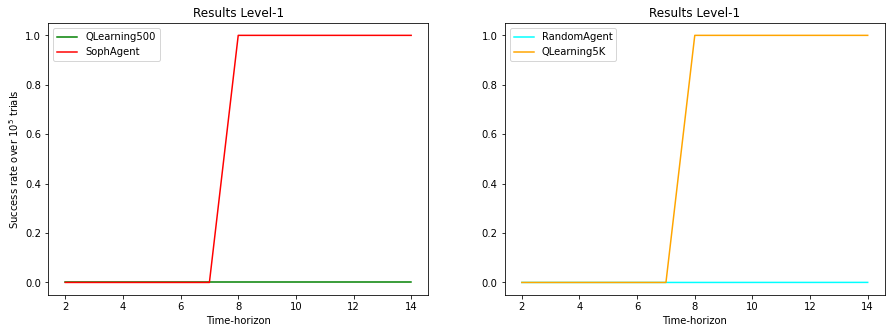

In [19]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(1, 2,figsize=(15,5))

axis[0].plot(Timehorizon,SuccessRateQ500,color='green')
axis[0].plot(Timehorizon,SuccessRateSI,color='red')
axis[0].legend(["QLearning500","SophAgent"])
axis[0].set_title("Results Level-1")
plt.xlabel("Time-horizon")
axis[0].set_xlabel("Time-horizon")
axis[0].set_ylabel("Success rate over $10^5$ trials")

axis[1].plot(Timehorizon,RandomagentSR,color='cyan')
axis[1].plot(Timehorizon,SuccessRateQ5000,color='orange')
axis[1].legend(["RandomAgent","QLearning5K"])
axis[1].set_title("Results Level-1")
axis[1].set_xlabel("Time-horizon")

plt.savefig('ResultsLevel-1.eps',format='eps',dpi=500,bbox_inches='tight')